<h2>Analiza rozkładu zagęszczenie punktów w przestrzeni 2D bazując na analizie rozkładu długości krawędzi w grafie dla TSP</h2>


<h3>1. Import bibliotek i zdefiniowanie patternów </h3>

In [168]:
import math

PATTERN_TO_DIRECTORY_FROM_DATASET = "TSP_DIST_1000_N_%d"
PATTERN_TO_FILE_NAME_OF_SAMPLE = "TSP_CITIES_SET_%d_N_%d.json"
DIRECTORY_NAME_WITH_INPUT_DATA = "dataset"
from input.TspInputData import TspInputData
from builders.PathBuilder import PathBuilder
from data_reader import JsonTspReader
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

<h3>2. Wczytanie danych z o krawędziach z pliku wejściowego</h3>

In [169]:

NUMBER_OF_CITIES = 14
INDEX_OF_SAMPLE = 4
name_of_directory_from_dataset = PATTERN_TO_DIRECTORY_FROM_DATASET % NUMBER_OF_CITIES
name_of_sample_file = PATTERN_TO_FILE_NAME_OF_SAMPLE % (INDEX_OF_SAMPLE, NUMBER_OF_CITIES)
path_to_input_data = PathBuilder()\
                        .add_dir(DIRECTORY_NAME_WITH_INPUT_DATA)\
                        .add_dir(name_of_directory_from_dataset)\
                        .add_file_with_extension(name_of_sample_file)\
                        .build()

json_data = JsonTspReader.read_json_from_path(path_to_input_data)
tsp_input_data = TspInputData(json_data)
distances = list(map(lambda item: item[2], tsp_input_data.dist_list))
distances.sort()
distances_as_series = pd.Series(distances)
distances_as_series

0       159.398871
1       159.398871
2       169.499263
3       169.499263
4       236.907155
          ...     
177    2158.831165
178    2205.307235
179    2205.307235
180    2464.618632
181    2464.618632
Length: 182, dtype: float64

<h3>3. Wyliczenie parametrów rozkłądu gausa oraz wykreślenie jego krzywej</h3>

u:  0.42609366461907366
q:  0.0488703257178797
n:  182
min:  0.0
max:  1.0


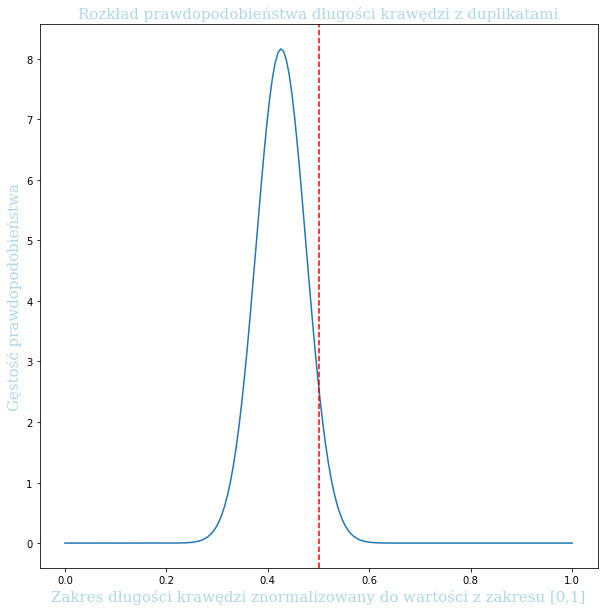

In [170]:
def gause(x,q, u):
    part_1 = 1.0/(q*math.sqrt(2.0*math.pi))
    part_2 = math.exp(-((x-u)*(x-u)/(2 *(q*q))))
    return part_1 * part_2
distances_as_series_no_duplicates = distances_as_series.drop_duplicates(inplace=False)
n = distances_as_series.size
normalized_dist = (distances_as_series-pd.Series([distances_as_series.min()] * n)) / (pd.Series([distances_as_series.max()] *n)-pd.Series([distances_as_series.min()] * n))
u = normalized_dist.mean()
q = normalized_dist.var()
std = normalized_dist.std()
min = normalized_dist.min()
max = normalized_dist.max()
print("u: ", u)
print("q: ", q)
print("n: ", n)
print("min: ", min)
print("max: ", max)
x = np.linspace(min, max, n)
y = [gause(a,q,u) for a in x]


font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'lightblue','size':15}
%matplotlib inline
plt.figure(figsize=(10,10))
plt.title("Rozkład prawdopodobieństwa długości krawędzi z duplikatami", fontdict = font2)
plt.xlabel("Zakres długości krawędzi znormalizowany do wartości z zakresu [0,1]", fontdict = font2)
plt.ylabel("Gęstość prawdopodobieństwa", fontdict = font2)
plt.plot(x,y)
plt.axvline(x = (max- min) /2, ymin = 0, ymax=8,linestyle="--", color="red")
plt.show()

u:  0.24732288007228792
q:  0.012406199769184998
n:  91
min:  0.0
max:  0.40837889972297986


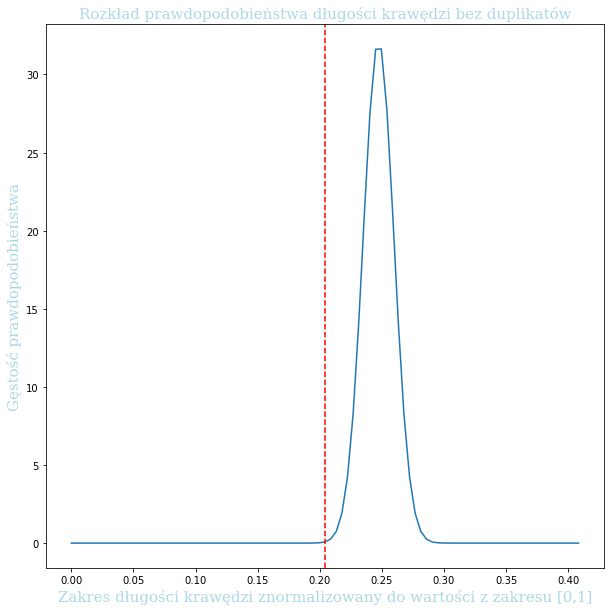

In [171]:
distances_as_series_no_duplicates = distances_as_series.drop_duplicates(inplace=False)
n = distances_as_series_no_duplicates.size
normalized_dist = (distances_as_series_no_duplicates-pd.Series([distances_as_series_no_duplicates.min()] * n)) / (pd.Series([distances_as_series_no_duplicates.max()] *n)-pd.Series([distances_as_series_no_duplicates.min()] * n))
u = normalized_dist.mean()
q = normalized_dist.var()
std = normalized_dist.std()
min = normalized_dist.min()
max = normalized_dist.max()
print("u: ", u)
print("q: ", q)
print("n: ", n)
print("min: ", min)
print("max: ", max)
x = np.linspace(min, max, n)
y = [gause(a,q,u) for a in x]

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'lightblue','size':15}
%matplotlib inline
plt.figure(figsize=(10,10))
plt.title("Rozkład prawdopodobieństwa długości krawędzi bez duplikatów", fontdict = font2)
plt.xlabel("Zakres długości krawędzi znormalizowany do wartości z zakresu [0,1]", fontdict = font2)
plt.ylabel("Gęstość prawdopodobieństwa", fontdict = font2)
plt.plot(x,y)
plt.axvline(x = (max- min) /2, ymin = 0, ymax=8,linestyle="--", color="red")
plt.show()


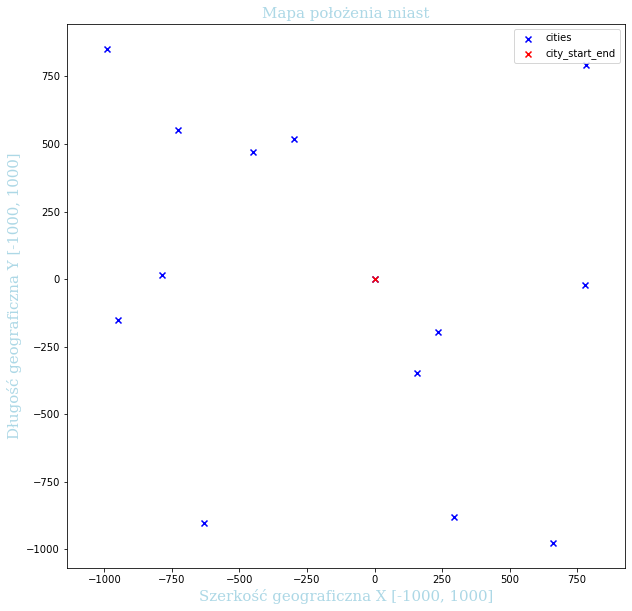

In [172]:
x_positions = list()
y_positions = list()
for city in tsp_input_data.list_of_cities:
    x_positions.append(city.x)
    y_positions.append(city.y)
x_positions = np.array(x_positions)
y_positions = np.array(y_positions)
plt.figure(figsize=(10,10))
plt.scatter(x_positions, y_positions, c="b", marker='x', label="cities")
plt.scatter([0], [0], c="r", marker='x', label="city_start_end")
plt.legend(loc='upper right')
plt.title("Mapa położenia miast", fontdict = font2)
plt.xlabel("Szerkość geograficzna X [-1000, 1000]", fontdict = font2)
plt.ylabel("Długość geograficzna Y [-1000, 1000]", fontdict = font2)
plt.axis('equal')
plt.show()

In [173]:
# fig, ax = plt.subplots(2, sharex=True, sharey=True)         # Prepare 2 plots
# ax[0].set_title('Raw nodes')
# ax[1].set_title('Optimized tour')
# ax[0].scatter(positions[:, 0], positions[:, 1])             # plot A
# ax[1].scatter(positions[:, 0], positions[:, 1])             # plot B
# start_node = 0
# distance = 0.
# for i in range(N):
#     start_pos = positions[start_node]
#     next_node = np.argmax(x_sol[start_node]) # needed because of MIP-approach used for TSP
#     end_pos = positions[next_node]
#     ax[1].annotate("",
#             xy=start_pos, xycoords='data',
#             xytext=end_pos, textcoords='data',
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3"))
#     distance += np.linalg.norm(end_pos - start_pos)
#     start_node = next_node
#
# textstr = "N nodes: %d\nTotal length: %.3f" % (N, distance)
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# ax[1].text(0.05, 0.95, textstr, transform=ax[1].transAxes, fontsize=14, # Textbox
#         verticalalignment='top', bbox=props)
#
# plt.tight_layout()
# plt.show()